# 糖尿病の進行状況を機械学習により予測する

scikit-learnに糖尿病患者のサンプルデータがあるので、データ分析を行い1年後の進行状況を予測する。

サンプルデータ(https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)

今回はprofile_report関数を用いてデータ分析を行いたいのでprofile_report関数が使えるjupyter notebookを使った。

# 流れ

データの確認

↓

特徴量エンジニアリング

↓

機械学習

↓

検証

# データの確認

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

feature_namesが特徴量であり、targetが今回予測に使う項目である。

In [109]:
data_diabetes = load_diabetes()
data_diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

diabetesデータをもっと詳しく見ていく

患者数は442人、特徴量数は10であり、ageは年齢、sexは性別、bmiはBMI、bpは血圧、s1はT-細胞、s2は悪玉コレステロール、s3は善玉コレステロール、s4は甲状腺刺激ホルモン、s5はLTG、s6はグルコースであることがわかった。

In [110]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

特徴量をpandasのデータフレームとして取り出してみる

In [111]:
data_columns = pd.DataFrame(data_diabetes["data"],columns=data_diabetes["feature_names"])
data_columns.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641

今度はtargetを取り出してみる

targetデータには、糖尿病の進行状況を数値化した値が入っている

In [112]:
data_target = pd.DataFrame(data_diabetes["target"],columns=["target"])
data_target.head()

target
0   151.0
1    75.0
2   141.0
3   206.0
4   135.0

横軸に1年後の進行状況(target)、縦軸に人数を指定してヒストグラム化する。

In [113]:
data_target["target"].hist(bins=50,figsize=(7,5))
plt.xlabel("target")
plt.ylabel("Number of people")

Text(0, 0.5, 'Number of people')

data_columnsとdata_targetを連結させる。axis=1にすることで横に連結できる。

In [114]:
data = pd.concat([data_columns, data_target], axis=1)
data.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019908 -0.017646   151.0  
1 -0.039493 -0.068330 -0.092204    75.0  
2 -0.002592  0.002864 -0.025930   141.0  
3  0.034309  0.022692 -0.009362   206.0  
4 -0.002592 -0.031991 -0.046641   135.0

# 特徴量エンジニアリング(EDA)

特徴量エンジニアリングとは、データから機械学習アルゴリズムが予測するうえで有用な新しい特徴量を作成する方法のことである。

profile_report関数によって、データ全体および特徴量およびtargetを見ていく

variablesは各特徴量の概要が、データ型に応じたフォーマットで表示され、欠損値や平均、最小値、最大値などがわかる。

欠損値はどのデータにも認められず、欠損値処理しなくてもいいことがわかる。

また、sexは数値ではないデータ型であるカテゴリカルデータであることがわかる。

Correlationsはヒートマップを示し、それぞれの特徴量同士の相関係数を示す。

targetと相関が最も強いのはbmiで、次いで強いのがs5であることがわかった。

In [115]:
import pandas_profiling

data.profile_report()

seabornを用いてtargetとbmiおよびs5の散布図を見てみる

ヒートマップ通り、相関係数が0.6付近であることがなんとなくわかる

In [116]:
import seaborn as sns

sns.scatterplot( x='bmi', y="target", data=data)

<AxesSubplot:xlabel='bmi', ylabel='target'>

<AxesSubplot:xlabel='s5', ylabel='target'>

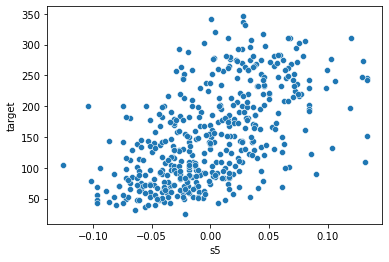

In [117]:
sns.scatterplot( x='s5', y="target", data=data)

# 機械学習モデルの作成

今回使用するモデルは線形回帰モデルと呼ばれるscikit-learnのLinearRegressionとなる。

data_columnsを予測に使う変数(説明変数)に、data_targetを予測したい変数(目的変数)に分割する。

分割比率は無指定なので学習データが75%、検証データが25%となる。

In [141]:
from sklearn import linear_model
import sklearn.model_selection
model = linear_model.LinearRegression()
# 予測に使う変数(説明変数)X
X = data_columns
# 予測したい変数(目的変数)Y
y = data_target
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)
model.fit(X_train, y_train)

LinearRegression()

学習したモデルの可視化

In [150]:
fig, ax = plt.subplots()
# x軸にtargetの値を、y軸にdata_columnsを予測した値を入れる
ax.scatter(y, model.predict(X), edgecolors=(0, 0, 0))
# x軸y軸の取りうる値の範囲をyの最小値から最大値までに設定し、黒の波線('k--')、ラインの太さを4に設定する。
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('target')
ax.set_ylabel('predicted')
plt.show()

# 検証

学習データ、検証データどちらもおよそ50%程度の精度を示した。

In [143]:
# 精度の検証
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.525819061787323
0.46428848820814284


二次元配列であるから[0]で値を取り出す

In [144]:
print(model.coef_)

[[ -36.0329024  -241.4004512   559.41873995  350.05852374 -572.60453945
   270.68173811   63.88190482  218.86066908  584.79637919  133.35337149]]


説明変数ごとに寄与している変数の係数を出力

bmiとs5の寄与率が高い、つまり影響が大きいことがわかる。

In [145]:
coef = pd.DataFrame({"feature_names": data_columns.columns, "coefficient":model.coef_[0]})
coef

feature_names  coefficient
0           age   -36.032902
1           sex  -241.400451
2           bmi   559.418740
3            bp   350.058524
4            s1  -572.604539
5            s2   270.681738
6            s3    63.881905
7            s4   218.860669
8            s5   584.796379
9            s6   133.353371

# 将来予測

feature_namesの項目を検査した、あるカルテデータ(適当に作ったデータ)を将来予測する。

モデルにデータを渡すことで、一年後の糖尿病の進行状況がtargetと同じように値として渡された。

In [146]:
predict_test = np.array([[0.00900, 0.0050680, 0.02432, -0.002863, 0.06534, -0.05243, 0.01342, -0.2387, 0.03847, -0.04627]])

In [147]:
predict_test = pd.DataFrame(predict_test, columns=data_diabetes["feature_names"])
predict_test

age       sex      bmi        bp       s1       s2       s3      s4  \
0  0.009  0.005068  0.02432 -0.002863  0.06534 -0.05243  0.01342 -0.2387   

        s5       s6  
0  0.03847 -0.04627

一年後の糖尿病の進行状況は約78と予測された。

In [148]:
model.predict(predict_test)

array([[77.93981696]])

# 考察

機械学習モデルを作り一年後の糖尿病の進行状況を予測することができた。

しかし、モデルの精度が悪いので、今後は機械学習アルゴリズムを変えて、精度があがるように改善していきたい。

また、今回用いたデータは人のデータを用いたが、動物のデータを用い、特徴量に品種や遺伝情報を加えるとどのような結果になるのか興味が湧く。